Classify grayscale images of handwritten digits ( 28 * 28) pixels into their 10 categories (0 through 9), we'll be using the MNIST dataset, which consists of 60,000 training Images and 10,000 test images.
This problem is basically the " Hello World" of deep Learing

In [0]:


import keras
keras.__version__



Using TensorFlow backend.


'2.2.4'

In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


A deep-learning model is like a seive for data proessing, made of a succession of increasingly refined data fiters called layers. So, what a layer does is that it takes the input data and produces meaningful representations. Most of deep learning consists of a chain of layers that will implement a form of progressive distillation.
Dense Layer menas fully-connected

In [0]:
from keras import models
from keras import layers

In [0]:
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


Sequential is a linear stack of layers to which new layers can be added via the add() method, the input_shape arg tells the first layer what dimension of the input they'll be receiving, in the subsequent layers can do automatic shape inference.
In the above you ca nsee that we have used a 10 neural network set layer with "softmax" as the activation function which gives an array of 10 probabilty scores summing to 1. As we are dong the MNIST classification each value will point to the probabilty that the current digit image belongs to one of our 10-digit classes. 

### Compilation


Before training the model we need to configure the learning process which we do using the compile() method. This method takes in 3 args, (loss function, optimizer, Metrics to monitor during training and testing)
loss function-: How the network will be able to access its performance on training data and be able to steer itself in the right direction.
optimizer:- the mechanism through which the network will update itself based on the data it sees and its loss function.
Metrics to monitor during training and testing:- here, accuracy (fraction of Images correctly classified)

In [0]:
network.compile(optimizer="rmsprop",
               loss="categorical_crossentropy",
               metrics=["accuracy"])

### Preparing the Image data

we'll process the data by reshaping it into the shape the network expects ( see above it expects a 28*28 shape)
so, the training data is already in shape but still we use the reshape function and transform it to a float32 array with values between 0 and 1

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### Preparing the labels

In [0]:
from keras.utils import to_categorical

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
train_images.shape

(60000, 784)

Now, that we have prepared the data, we are ready to fit the model to the training data, using the networks 'fit method'


In [0]:
network.fit(train_images, train_labels, epochs=50, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.2545 - acc: 0.9262
Epoch 2/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.1046 - acc: 0.9689
Epoch 3/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.0684 - acc: 0.9796
Epoch 4/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.0497 - acc: 0.9850
Epoch 5/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.0371 - acc: 0.9890
Epoch 6/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.0281 - acc: 0.9917
Epoch 7/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.0214 - acc: 0.9937
Epoch 8/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.0170 - acc: 0.9950
Epoch 9/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.0127 - acc: 0.9965
Epoch 10/50
60000/60000 [==========================

So, the main difference between and epoch ad batch_size is 
epoch is the number of times/ iterations you want to run the entire sample/data on the model and batch_size is after how many samples you want to update/correct the gradient. 

### testing the model

lets see how the model performs on the test data by using the network's evaluate function

In [0]:
test_loss, test_accuracy = network.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 76us/step


In [0]:
test_loss

0.123845466472739

In [0]:
test_accuracy

0.9834

So, the test accuracy is significantly lower that the train_accuracy which could be due to overfittig of the model by the training set.

## Data Representations for Neural Networks

### Scalars

In [0]:
import numpy as np

In [0]:
x = np.array(12)

In [0]:
x.ndim

0

### Vectors ( 1D Tensors)

In [0]:
x = np.array([1,2,3,4])

In [0]:
x.ndim

1

### Matrices (2D Tensors)

In [0]:
x = np.array([[1,2,3],
            [4,5,6],
            [7,8,9]])

In [0]:
x.ndim

2

In [0]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### key attributes of a Tensor

In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
digit = train_images[34]
digit.ndim

2

In [0]:
import matplotlib.pyplot as plt

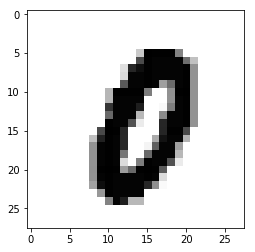

In [0]:
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

### Manipulating Tensors in numpy

In [0]:
my_slice = train_images[10:100]

In [0]:
my_slice.shape

(90, 28, 28)

In [0]:
my_slice = train_images[10:100,:28,:28]

In [0]:
my_slice.shape

(90, 28, 28)

In [0]:
my_slice = train_images[:,:14,:14]

In [0]:
my_slice.shape

(60000, 14, 14)

### The notion of data-batches

just keep one thing in mind, that it means data sample

### Vector data
it has number of Samples and features

### Image Data

for an 100 Images each of height 28 ( pixels), and width 28 ( pixels) and a grayscale channel can be defined by a (100,28,28,1) ie a 4D Tensor while for a RGB channel can be defined by a (100,28,28,3) Tensor 

Theano uses channels-first convention
TF uses channels-last covention

### Video Data

A video can be understood as a series of frames, each frame being a color image
(samples,frame, height, width,color_depth)
5D tensor

### The gears of neural networks

Element-wise operation:- the operations that are applied independently to each entry in the tensors being considered.


In [0]:
y = np.array([[1,2,3],
            [1,2,3]])
y.shape[0]

2

In [0]:
def naive_relu(x):
    assert len(x.shape) == 2
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x

In [0]:
naive_relu(y)

array([[1, 2, 3],
       [1, 2, 3]])

In [0]:
x = np.random.random((32,10))

In [0]:
y = np.random.random((32,10))

Each neural layer transforms the input data acording to 

output = relu(dot(W, input) + b)
W and b are the tensors that are attributes of the layer. W is Weights (kernel) or trainable parametrs of the layer And b bias 

the weights contain information learned by the networkk from exposure to training data.
Initially the weight matrices are filled with random values ( random initialization), so the output = relu(dot(W,input) +b) will not yeild anything intresting but this the starting point bc as we feed the training/input data to the network the feedback signal will help in adjusting the weights to get a better performance for he next batch of input and the performance wil gradually improve

### Training loop

#### Step 1 
draw a batch of training samples x and corresponding targets/labels y

#### Step 2
run the network on x ( a step called forward pass to obatain a prediction y_pred

#### step 3 
compute the loss of the network on the batch, a measure of missmatch between y_pred and y

#### step 4
update the weights  in order to minimize the loss

## chapter 3 Getting started with neural network
### anatomy of neural networks


Different layers are appropriate for different tensor formats and differen type f data processing.

for a simple vector data stored in 2D tensors of shape ( samples, features) dense layer/ fully connected layer is good for processing. for a sequence data of type 3D Tensor of shape( samples, timesteps, features) recurrent layers such as LSTMlayer is good for processing. for Image processing , store as a 4D tensor is usually processed by 2D convolutional layers( conv2D)

In input shape the batch dimension is not included
